## Confluences between Artist Sale Prices: British Post-War Contemporary Micro-Art Markets from 1990-1995

### Sohil S. Patel, 
#### May 12th, 2017

#### ABSTRACT:
Some art economists believe that the micro-markets of individual artists are independent of one another. This project seeks to either confirm or deny this view point on the art market. By studying the confluences between 3 British Post-War Contemporary Artists and their respective sale prices, we can  make an informed hypothesis on whether individual artists' markets are in fact independent. The artists Francis Bacon, Lucian Freud, and Frank Auerbach were chosen for this analysis because they are all from within the same genre of british post-war contemporary art, belong to the same stylistic movements, and are considered by the art historical community to be highly related. While each of their individual artworks’ values vary, what is more relevant for this analysis is the whether their prices move together or not. There are four prongs to my analysis: 1) a sorting of the raw Post-Auction data gathered from Artnet (an online art price database), 2) creation of key metrics using the sale price data, 3) a graphical representation to determine which of these artists had the “strongest” market, and 4) a comparison of the 3 artists' sale price by year. My hypothesis is that the artist with the “strongest” market will be a sort of genre-leader and the other artists' changes in sale price will follow in tow. The ultimate goal is to discover empirical evidence of a correlation between individual artist's markets at the micro-level. Potential benefits of an affirmative conclusion include: lower risk for using art as an asset class, more strategic sale timing of artworks, and more accurate appraisal and valuation techniques. 


In [675]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt         # pyplot module
import datetime as dt                  # date and time module
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from scipy.stats import linregress

%matplotlib inline

#### 1) Data Source and Data Usage
The data  used here is sourced from Artnet, the leading art price database. The sale prices are historic auction data from around the globe. I have picked a 5 year sampling period from 1990-1995 for this analysis. The data is split into 4 categories; Year of Sale, Low Estimate, High Estimate, and Price Realized. Whenever an artwork is for sale at auction, appraisers give an estimated range of potential sale prices. Given that art has no fundamental or intrinsic value, valuation of art can be fickle and hence appraisers have adopted an interval method. 


In [676]:
#Data for Francis Bacon Art Prices

path_fb = '/Users/Sohil/Desktop/Data_Bootcamp_Final/FrancisBacon.csv'
fb = pd.read_csv(path_fb, 
                   thousands=',')    

fb = fb.rename(columns={'a' : 'Year', 'b' : 'Low_Estimate', 'c' : 'High_Estimate', 'd' : 'Price'})

#Calculating key metric of Sale Price Deviation %
fb['Percent_Deviation_from_Low_Estimate'] = ((fb['Price'] - fb['Low_Estimate']) / (fb['Low_Estimate'])) * 100
fb['Percent_Deviation_from_High_Estimate'] = ((fb['Price'] - fb['High_Estimate']) / (fb['High_Estimate']))* 100


In [677]:
#Data for Frank Auerbach Sale Prices

path_fa = '/Users/Sohil/Desktop/Data_Bootcamp_Final/FrankAuerbach.csv'
fa = pd.read_csv(path_fa,
                   thousands=',')    

fa = fa.rename(columns={'a' : 'Year', 'b' : 'Low_Estimate', 'c' : 'High_Estimate', 'd' : 'Price'})

#Calculating key metric of Sale Price Deviation %
fa['Percent_Deviation_from_Low_Estimate'] = ((fa['Price'] - fa['Low_Estimate']) / (fa['Low_Estimate'])) * 100
fa['Percent_Deviation_from_High_Estimate'] = ((fa['Price'] - fa['High_Estimate']) / fa['High_Estimate']) * 100

In [678]:
#Data for Lucian Freud Sale Prices

path_lf = '/Users/Sohil/Desktop/Data_Bootcamp_Final/LucianFreud.csv'
lf = pd.read_csv(path_lf,
                   thousands=',')   
lf = lf.rename(columns={'a' : 'Year', 'b' : 'Low_Estimate', 'c' : 'High_Estimate', 'd' : 'Price'})

#Calculating key metric of Sale Price Deviation %
lf['Percent_Deviation_from_Low_Estimate'] = ((lf['Price'] - lf['Low_Estimate']) / (lf['Low_Estimate'])) * 100
lf['Percent_Deviation_from_High_Estimate'] = ((lf['Price'] - lf['High_Estimate']) / (lf['High_Estimate'])) * 100

In [679]:
#Metric test of market strength of each artist

fb_low_dev_mean = fb['Percent_Deviation_from_Low_Estimate'].mean()
fb_high_dev_mean = fb['Percent_Deviation_from_High_Estimate'].mean() 
#Mean of deviation percentage for Francis Bacon 

fa_low_dev_mean = fa['Percent_Deviation_from_Low_Estimate'].mean() 
fa_high_dev_mean = fa['Percent_Deviation_from_High_Estimate'].mean() 
#Mean of deviation percentages for Frank Auerbach 

lf_low_dev_mean = lf['Percent_Deviation_from_Low_Estimate'].mean()
lf_high_dev_mean = lf['Percent_Deviation_from_High_Estimate'].mean()
#Mean of deviation percentages for Lucian Freud



From this data we calculated two key metrics which will be useful in determining which of these three artist’s markets was most robust in this period. The percent deviation between Price Realized and the cooresponding Low and High estimate is an efficient way to test for market strength. If an artist is consistently performing above the appraiser’s high estimate (i.e. a positive deviation value) that indicates that the artist is outperforming market expectations. On the other hand, a weak artist’s market is consistently underperformaning if it is reamining close to its low estimate value. The real utility of this metric is as a means to measuring 'strength' of market performance. Whichever of these artist have the highest positive deviation values will likely be the one to be most consistently performaning. Whichever artists is determenined to have the highest positive deviation value( if my hypothesis holds true) would be the "market leader" of this group of artists . If we can see any coorelation between upward trending deiviations and upward moving sale prices, we can more confidently believe that indiviudual artists' markets do affect one another. 
Now, I have used these metrics to create two bar charts. The first represents the mean % deviation between the price realized and the low estimate while the second represenets the mean % deviation between the price and the high estimate. 


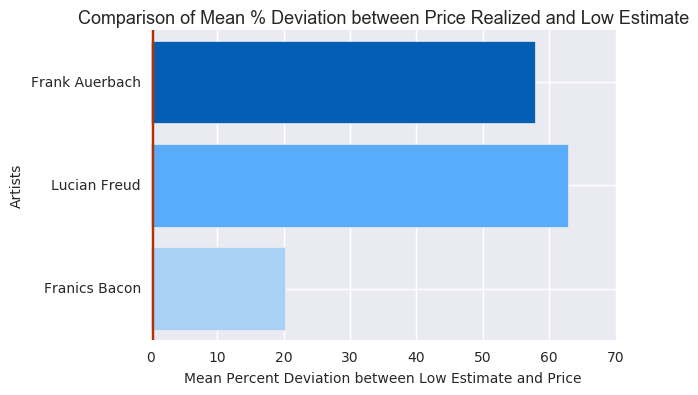

In [680]:
#Bar graph depiciting mean deviation percentages per artist 

D = {'Franics Bacon':fb_low_dev_mean, 'Frank Auerbach': fa_low_dev_mean, 'Lucian Freud':lf_low_dev_mean}

plt.barh(range(len(D)), 
         D.values(), 
         align='center', 
         color=['#A9D0F5', '#58ACFA', '#045FB4'],)

plt.yticks(range(len(D)), D.keys())

plt.axvline(x=0.3, color='#B43104')

plt.ylabel('Artists', fontsize=10)

plt.xlabel ('Mean Percent Deviation between Low Estimate and Price', fontsize= 10)

plt.title("Comparison of Mean % Deviation between Price Realized and Low Estimate", fontsize=13)

plt.show()

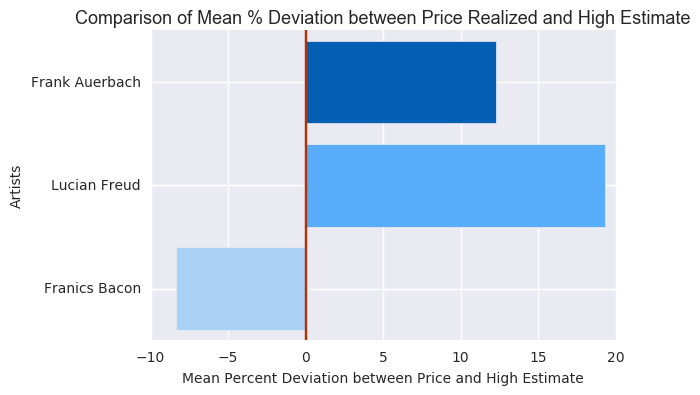

In [681]:
#Bar graph depiciting mean deviation percentages per artist 
D = {'Franics Bacon':fb_high_dev_mean, 'Frank Auerbach': fa_high_dev_mean, 'Lucian Freud':lf_high_dev_mean}

plt.barh(range(len(D)), 
         D.values(), 
         align='center', 
         color=['#A9D0F5', '#58ACFA', '#045FB4'],)

plt.axvline(x=0, color='#B43104')
plt.yticks(range(len(D)), 
           D.keys())
plt.ylabel('Artists', fontsize=10)

plt.xlabel ('Mean Percent Deviation between Price and High Estimate', fontsize= 10)

plt.title("Comparison of Mean % Deviation between Price Realized and High Estimate", fontsize=13)

It is clear from this set of data that Lucian Freud is constistantly outperfomning his market while Frank Auerbach takes a close second while Francis Bacon lags behind. Now we will compare these finding to sale prices to see if there are any connections that can be drawn.

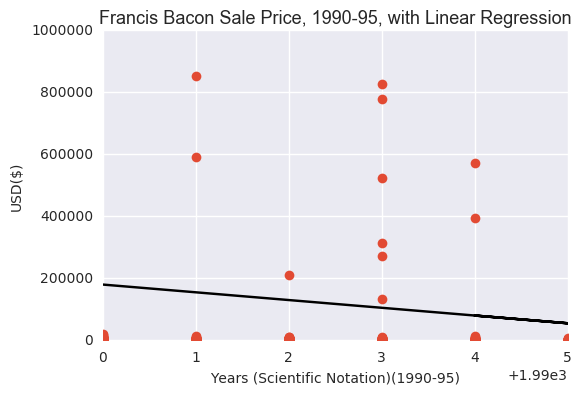

In [682]:
x= fb['Year']
y= fb['Price']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Used a linear regession model to estimate trend of markets. 
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

pylab.plot(x, y, 'o')

pylab.plot(x, predict_y, 'k-')
pylab.ylim(0,1000000)
pylab.xlim(1990,1995)
pylab.title('Francis Bacon Sale Price, 1990-95, with Linear Regression', fontsize=13)
pylab.ylabel('USD($)', fontsize=10)
pylab.xlabel('Years (Scientific Notation)(1990-95)', fontsize=10)

pylab.show()


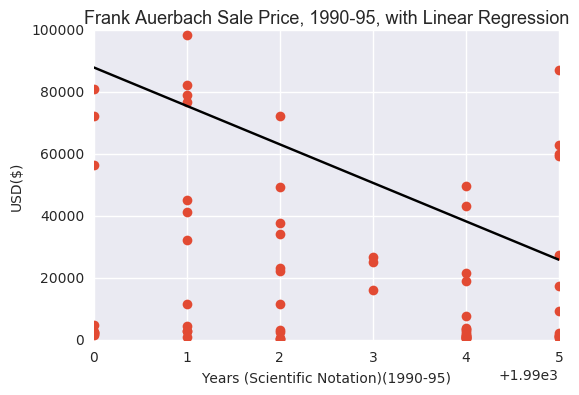

In [683]:

x= fa['Year']
y= fa['Price']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Used a linear regession model to estimate trend of markets. 

predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

pylab.plot(x, y, 'o')

pylab.plot(x, predict_y, 'k-')
pylab.ylim(0,100000)
pylab.xlim(1990,1995)
pylab.title('Frank Auerbach Sale Price, 1990-95, with Linear Regression', fontsize=13)
pylab.ylabel('USD($)', fontsize=10)
pylab.xlabel('Years (Scientific Notation)(1990-95)', fontsize=10)
pylab.show()

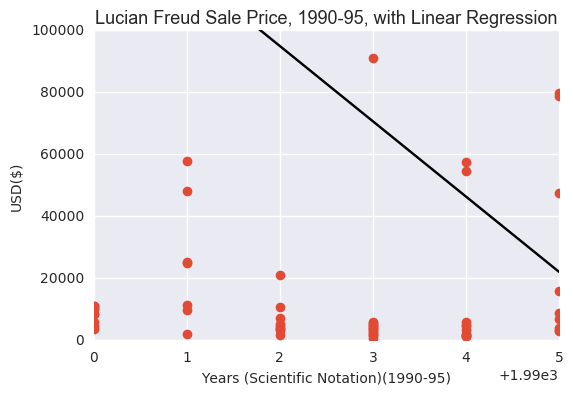

In [684]:

x= lf['Year']
y= lf['Price']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Used a linear regession model to estimate trend of markets. 

predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

pylab.plot(x, y, 'o')

pylab.plot(x, predict_y, 'k-')
pylab.ylim(0,100000)
pylab.xlim(1990,1995)
pylab.title('Lucian Freud Sale Price, 1990-95, with Linear Regression', fontsize=13)
pylab.ylabel('USD($)', fontsize=10)
pylab.xlabel('Years (Scientific Notation)(1990-95)', fontsize=10)
pylab.show()

### Conclusion



In a surprising ultimate finding, it appears as though there is a coorelation between larger percent deviations from estimate values and decreasing prices over time. All three artists trended downwards with their linear regressions and from 1990-1995 they saw a drastic negative slope to their sale prices. How does this explain the sale values which were consistently higher than estimates value for artists like Lucian Freud, who happens to have the steepest linear regression? While large positive deviations from estimate values might be a sign of a consistent market, it may still come with downward sloping art prices. If estimate values are falling faster than sale prices, it is highly possible that there can be a false positive aspect to those markets. However, we did see in our metric analysis of these artist's markets that they did tend to move together. Although the coorelation between sale prices and deviation percentages was unexpected, we are still able to conifdently confirm a relationship between invidual artist's markets. However, in conclusion, it is important to note that this represnts only a sample of a much larger artistic community and only further inquiry and deeper data analysis will truly confirm the confluences between micro-art markets. 